# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [23]:
# Load pickled data
import pickle
import numpy as np


print("Reading data.........")
training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test,  y_test = test['features'], test['labels']
    


Reading data.........


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [24]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)
image_shape = X_train[0].shape
n_classes = np.max(y_train)-np.min(y_train) + 1

image_depth_channels = X_train.shape[3]
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample images
Stats about the images.....
X_train.dtype = uint8 
np.min(X_train) = 0 
np.max(X_train) = 255 

X_valid.dtype = uint8 
np.min(X_valid) = 0 
np.max(X_valid) = 255 

X_test.dtype = uint8 
np.min(X_test) = 0 
np.max(X_test) = 255 



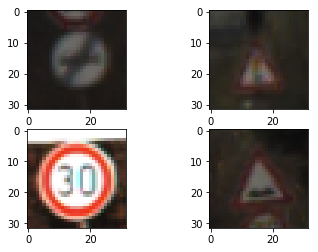

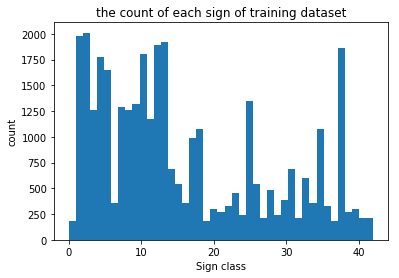

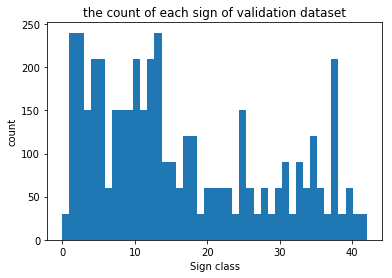

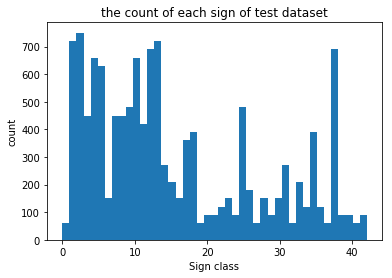

In [25]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.\n"
%matplotlib inline

print('Sample images')

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i*1500+1])
    
print("Stats about the images.....") 
print("X_train.dtype = {} ".format(X_train.dtype))
print("np.min(X_train) = {} ".format(np.min(X_train)))
print("np.max(X_train) = {} ".format(np.max(X_train)))
print()
print("X_valid.dtype = {} ".format(X_valid.dtype))
print("np.min(X_valid) = {} ".format(np.min(X_valid)))
print("np.max(X_valid) = {} ".format(np.max(X_valid)))
print()
print("X_test.dtype = {} ".format(X_test.dtype))
print("np.min(X_test) = {} ".format(np.min(X_test)))
print("np.max(X_test) = {} ".format(np.max(X_test)))
print()
    
plt.figure()
#plotting the count of each sign

def plot_hist(y,n,title):
        plt.title(title),
        plt.xlabel("Sign class")
        plt.ylabel("count")
        plt.hist(y, n)
        plt.show()
plot_hist(y_train, n_classes, "the count of each sign of training dataset")
plot_hist(y_valid, n_classes, "the count of each sign of validation dataset")
plot_hist(y_test, n_classes, "the count of each sign of test dataset")
    
hist_train = np.histogram(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

### Image Augementation  

#### Balancing images across classes 

In [26]:
from math import ceil 

def round_traditional(val,digits):
    return round(val+10**(-len(str(val))-1))

def ceiling(x):
    n = int(x)
    return n if n-1 < x <= n else n+1

def get_number_of_images_to_add(cls, bal_vals):
    minimum_required = 1000
    number_to_add = 0
    
    cls_record = np.where(bal_vals == cls)
    
    if len(cls_record) > 0 :
        number_to_add = bal_vals[cls_record[0]][0][1]
    return number_to_add     

def get_postion_of_images_cls(cls):
    return np.where(y_train == cls)

def get_image_list_by_cls(cls):
    positions = get_postion_of_images_cls(cls)
    image_list = np.zeros(shape=(len(positions[0]), 32, 32, 3), dtype=np.uint8)
    for i in range(len(positions[0])):
        image_list[i] = X_train[positions[0][i]]
    return image_list    


In [27]:
import scipy.misc


#Code taken from example in imageaug library https://github.com/aleju/imgaug
#____________________________________________________________________________________#

import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

# Example batch of images.
# The array has shape (32, 32, 32, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(32, 32)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    #iaa.Fliplr(0.5), # horizontal flips -- ******stopping this as it adding no value to the training data*****
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-15, 15),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

### End of borrowed Code _________________________________________________
print("Adding new images ...............................................................")
print("Shape of training set x {} y {} before adding new images".format(X_train.shape, y_train.shape))
total_added = 0
X_train_augmented  = X_train
y_train_augmented  = y_train

save = True
for i in range(n_classes):
    x_index = 0
    x = hist_train[1][i]
    if x > 0:
        cls = round_traditional(ceiling(x),2)
    else : 
        cls = 0

    img_list = get_image_list_by_cls(cls)
    if save == True:
        for c in range(len(img_list)):
            img = img_list[c]
            scipy.misc.toimage(img, cmin=0.0, cmax=...).save("generated_images/new/{}_original_image_{}.jpg".format(cls, c))
    iterations = 0
    
    total_new_images =  hist_train[0][i]
    if total_new_images > 1000:
        X_train_new = np.zeros(shape=(total_new_images, 32, 32, 3), dtype=np.uint8)
        y_train_new = np.zeros(shape=(total_new_images), dtype=np.uint8)
        iterations = 1
    else:   
        iterations = ceiling((1000/total_new_images))
        
        total_new_images = iterations * total_new_images
        X_train_new = np.zeros(shape=(total_new_images, 32, 32, 3), dtype=np.uint8)
        y_train_new = np.zeros(shape=(total_new_images), dtype=np.uint8)
    
    print("class {} new images added {} iterations {}".format(cls, total_new_images, iterations))
    total_added += total_new_images
    for j in range(iterations):
        new_images = seq.augment_images(img_list)
        if save == True:
            for x in range(len(img_list)):
                new_img = new_images[x]
                scipy.misc.toimage(new_img, cmin=0.0, cmax=...).save("generated_images/new/{}_new_image_{}.jpg".format(cls, x))
            save = False    
        for n in range(len(new_images)):
            img_new = new_images[n]
            
            X_train_new[x_index] = new_images[n]
            y_train_new[x_index] = cls
            x_index += 1
            
               
    X_train_augmented  = np.concatenate((X_train_augmented, X_train_new), axis=0)   
    y_train_augmented  = np.concatenate((y_train_augmented, y_train_new), axis=0)

print("Total image added {}".format(total_added))

Adding new images ...............................................................
Shape of training set x (34799, 32, 32, 3) y (34799,) before adding new images
class 0 new images added 1080 iterations 6
class 1 new images added 1980 iterations 1
class 2 new images added 2010 iterations 1
class 3 new images added 1260 iterations 1
class 4 new images added 1770 iterations 1
class 5 new images added 1650 iterations 1
class 6 new images added 1080 iterations 3
class 7 new images added 1290 iterations 1
class 8 new images added 1260 iterations 1
class 9 new images added 1320 iterations 1
class 10 new images added 1800 iterations 1
class 11 new images added 1170 iterations 1
class 12 new images added 1890 iterations 1
class 13 new images added 1920 iterations 1
class 14 new images added 1380 iterations 2
class 15 new images added 1080 iterations 2
class 16 new images added 1080 iterations 3
class 17 new images added 1980 iterations 2
class 18 new images added 1080 iterations 1
class 19 new 

In [28]:
print("Shape of training set x {} y {} after adding new images".format(X_train_augmented.shape, y_train_augmented.shape))

Shape of training set x (91827, 32, 32, 3) y (91827,) after adding new images


####  Normalising the Image

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [29]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

print ("Data Before normlaisation: .......")
print (" ")
print ("Training Data: ")
print ("Data Type = {}".format(X_train_augmented.dtype))
print ("Min Value = {}".format(np.min(X_train_augmented)))
print ("Max Value = {}".format(np.max(X_train_augmented)))
print (" ")

print ("Validation Data: ")
print ("Data Type = {}".format(X_valid.dtype))
print ("Min Value = {}".format(np.min(X_valid)))
print ("Max Value = {}".format(np.max(X_valid)))
print (" ")

print ("Test Data: ")
print ("Data Type = {}".format(X_test.dtype))
print ("Min Value = {}".format(np.min(X_test)))
print ("Max Value = {}".format(np.max(X_test)))
print (" ")

f128 = np.float32(128)
X_train = ((X_train_augmented.astype(np.float32)-f128)/f128)
X_valid = ((X_valid.astype(np.float32)-f128)/f128)
X_test = ((X_test.astype(np.float32)-f128)/f128)
y_train = y_train_augmented
print ("Data After normlaisation: .......")
print (" ")
print ("Training Data: ")
print ("Data Type = {}".format(X_train_augmented.dtype))
print ("Min Value = {}".format(np.min(X_train)))
print ("Max Value = {}".format(np.max(X_train)))
print (" ")

print ("Validation Data: ")
print ("Data Type = {}".format(X_valid.dtype))
print ("Min Value = {}".format(np.min(X_valid)))
print ("Max Value = {}".format(np.max(X_valid)))
print (" ")

print ("Test Data: ")
print ("Data Type = {}".format(X_test.dtype))
print ("Min Value = {}".format(np.min(X_test)))
print ("Max Value = {}".format(np.max(X_test)))
print (" ")

Data Before normlaisation: .......
 
Training Data: 
Data Type = uint8
Min Value = 0
Max Value = 255
 
Validation Data: 
Data Type = uint8
Min Value = 0
Max Value = 255
 
Test Data: 
Data Type = uint8
Min Value = 0
Max Value = 255
 
Data After normlaisation: .......
 
Training Data: 
Data Type = uint8
Min Value = -1.0
Max Value = 0.9921875
 
Validation Data: 
Data Type = float32
Min Value = -1.0
Max Value = 0.9921875
 
Test Data: 
Data Type = float32
Min Value = -1.0
Max Value = 0.9921875
 


### Model Architecture

In [30]:
import tensorflow as tf
tf.reset_default_graph()
modelLocation = './models/v2/trafficsign_model'
doTrain = True

In [31]:
from tensorflow.contrib.layers import flatten

num_layers = 5
keep_prob = tf.placeholder("float", (num_layers))
from tensorflow.contrib.layers import flatten

def LeNet(x, mu = 0, sigma = 0.1): 
    """
    Defines the network. `x` as input. 
    `mu` and `sigma`: Arguments used for tf.truncated_normal, randomly defines variables for 
                      the weights and biases for each layer
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.  6 => 16
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x16. Output = 14x14x16.  6 => 16
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x64.  Input 6 => 16  Output 16 => 64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.  16 => 64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x64. Output = 400.  16 => 64    400 => 1600
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120. 400 => 1600  120 => 240
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob[0])

    # Layer 4: Fully Connected. Input = 120. Output = 84.  120 => 240
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
                        
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob[1])

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
               
    regularizer_term = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) \
                    + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) 
    return conv1, conv2, logits, regularizer_term

In [34]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
from math import ceil

EPOCHS = 100
BATCH_SIZE = 128

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name='x-input')
    y = tf.placeholder(tf.int32, (None), name='y-input')
    one_hot_y = tf.one_hot(y, n_classes, name='y-one-hot')

rate = 0.001
beta = 0.005
global_step = tf.placeholder(tf.int32)
conv1, conv2, logits, regularizer_term = LeNet(x)
with tf.name_scope('optimizer'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(tf.reduce_mean(cross_entropy) + beta*regularizer_term)
    learning_rate = tf.train.exponential_decay(rate, global_step, 1, 0.99, staircase=True, name=None)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
confusion_matrix = tf.contrib.metrics.confusion_matrix(tf.argmax(one_hot_y, 1), tf.argmax(logits, 1), n_classes)
saver = tf.train.Saver()

def evaluate(X_data, y_data, conf_matrix = 0):
    num_examples = len(X_data)
    total_accuracy = 0
    if conf_matrix == 1:
        overall_confusion_matrix = tf.zeros([n_classes, n_classes], tf.int32)
        batch_conf_matrix = tf.zeros([n_classes, n_classes], tf.int32)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        if conf_matrix == 1:
            accuracy, batch_conf_matrix = sess.run([accuracy_operation,confusion_matrix], feed_dict={x: batch_x, y: batch_y, keep_prob: np.ones(num_layers)})      
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: np.ones(num_layers)})      
        
        total_accuracy += (accuracy * len(batch_x))
        
        if conf_matrix == 1:
            overall_confusion_matrix += batch_conf_matrix
    
    if conf_matrix == 1:
        return total_accuracy / num_examples, overall_confusion_matrix
    else:
        return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [35]:
import time
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    best_valid_accuracy = None
    best_epoch = 0
    for i in range(EPOCHS):
        X_train_epoch, y_train_epoch = shuffle(X_train, y_train)
        num_examples = len(X_train)
        start_time = time.time()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_epoch[offset:end], y_train_epoch[offset:end]
            _, loss, learning_rate_val, global_step_val = sess.run([training_operation, loss_operation, 
                            learning_rate, global_step], feed_dict={x: batch_x, y: batch_y, global_step:i, 
                                                        keep_prob: np.array([0.5, 0.5, 0.5, 0.5, 0.5])})
            #train_writer.add_summary(loss_write_summary, i)
            #train_writer.add_summary(learning_rate_write_summary, i)
        
        with tf.name_scope('accuracy'):
            train_accuracy = evaluate(X_train[0:n_train], y_train[0:n_train])
            validation_accuracy = evaluate(X_valid, y_valid)
        elapsed_time = time.time() - start_time 

        print("\n")
        print("EPOCH {}: {:.2f} secs".format(i+1, elapsed_time))
        print("Learning Rate = {:.6f}, Train Loss = {:.3f}, Train Accurary = {:.3f}, Validation Accuracy = {:.4f}".format(learning_rate_val, loss, train_accuracy, validation_accuracy))

        if best_valid_accuracy == None:
            best_valid_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, modelLocation)
            
            print("Best Model saved")
        elif validation_accuracy >= best_valid_accuracy:
            best_valid_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, modelLocation)
            print("Best Model saved")
        elif i > (best_epoch+20):
            break
        else:
            pass

Training...



EPOCH 1: 26.73 secs
Learning Rate = 0.001000, Train Loss = 2.439, Train Accurary = 0.658, Validation Accuracy = 0.5909
Best Model saved


EPOCH 2: 26.62 secs
Learning Rate = 0.000990, Train Loss = 2.132, Train Accurary = 0.892, Validation Accuracy = 0.8098
Best Model saved


EPOCH 3: 26.76 secs
Learning Rate = 0.000980, Train Loss = 1.945, Train Accurary = 0.937, Validation Accuracy = 0.8796
Best Model saved


EPOCH 4: 26.59 secs
Learning Rate = 0.000970, Train Loss = 1.677, Train Accurary = 0.935, Validation Accuracy = 0.8785


EPOCH 5: 26.65 secs
Learning Rate = 0.000961, Train Loss = 1.802, Train Accurary = 0.958, Validation Accuracy = 0.8948
Best Model saved


EPOCH 6: 27.14 secs
Learning Rate = 0.000951, Train Loss = 2.060, Train Accurary = 0.953, Validation Accuracy = 0.8977
Best Model saved


EPOCH 7: 26.78 secs
Learning Rate = 0.000941, Train Loss = 1.430, Train Accurary = 0.964, Validation Accuracy = 0.9229
Best Model saved


EPOCH 8: 26.88 secs
Learning Rate = 



EPOCH 67: 26.67 secs
Learning Rate = 0.000515, Train Loss = 1.353, Train Accurary = 0.988, Validation Accuracy = 0.9587


EPOCH 68: 26.66 secs
Learning Rate = 0.000510, Train Loss = 0.954, Train Accurary = 0.987, Validation Accuracy = 0.9406


EPOCH 69: 26.65 secs
Learning Rate = 0.000505, Train Loss = 1.105, Train Accurary = 0.988, Validation Accuracy = 0.9531


EPOCH 70: 26.80 secs
Learning Rate = 0.000500, Train Loss = 1.111, Train Accurary = 0.989, Validation Accuracy = 0.9583


EPOCH 71: 27.13 secs
Learning Rate = 0.000495, Train Loss = 1.269, Train Accurary = 0.990, Validation Accuracy = 0.9562


EPOCH 72: 26.68 secs
Learning Rate = 0.000490, Train Loss = 1.259, Train Accurary = 0.989, Validation Accuracy = 0.9571


EPOCH 73: 26.67 secs
Learning Rate = 0.000485, Train Loss = 1.238, Train Accurary = 0.990, Validation Accuracy = 0.9544


INFO:tensorflow:Restoring parameters from ./models/v2/trafficsign_model
Accuracies from the trained model...
Train Accurary = 0.988, Validation Accuracy = 0.9615, Test Accuracy = 0.9456
Confusion Matrix on Validation Set


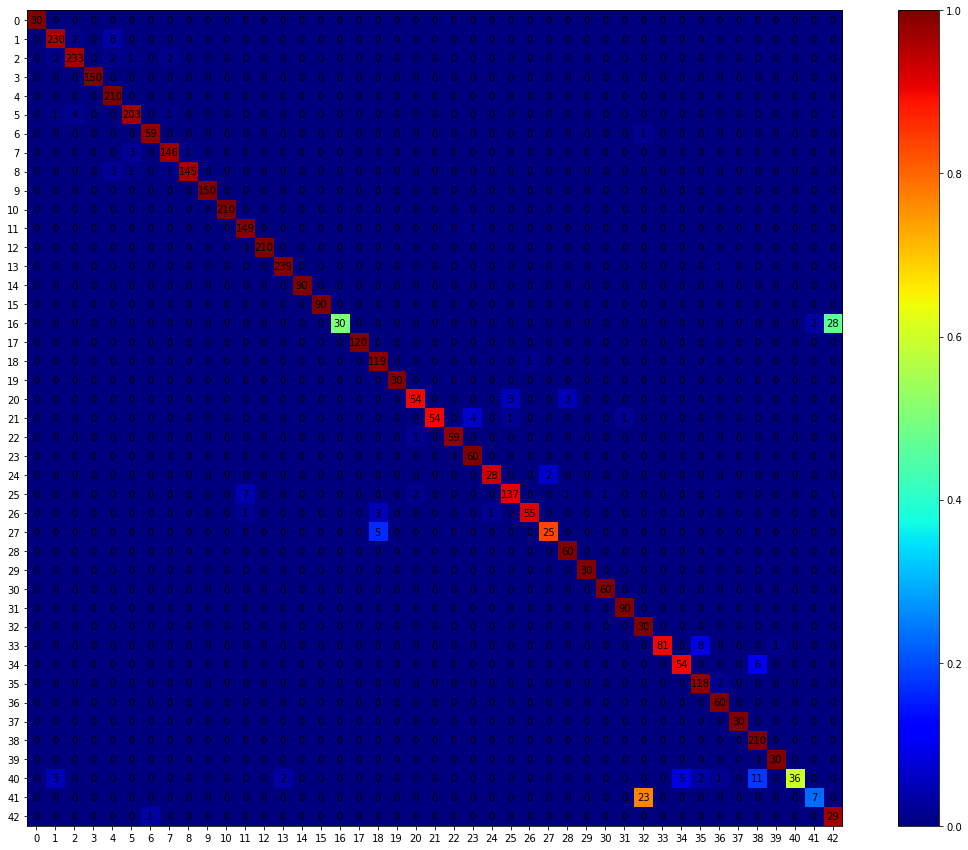

In [36]:
# This cell calculates the final training, validation and test accuracy for the trained model
with tf.Session() as sess:
    saver.restore(sess, modelLocation)
    train_accuracy = evaluate(X_train[0:n_train], y_train[0:n_train])
    validation_accuracy, valid_conf_matrix = evaluate(X_valid, y_valid, 1)
    test_accuracy = evaluate(X_test, y_test)
    print("Accuracies from the trained model...")
    print("Train Accurary = {:.3f}, Validation Accuracy = {:.4f}, Test Accuracy = {:.4f}".format(train_accuracy, validation_accuracy, test_accuracy))
    print("Confusion Matrix on Validation Set")
    conf_arr = valid_conf_matrix.eval()

# The code below creates a confusion matrix image on validation set
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(20, 15))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for i in range(width):
    for j in range(height):
        ax.annotate(str(conf_arr[i][j]), xy=(j, i), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = range(0,43)
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")